In [299]:
!pip install unidecode

In [300]:
# Se importan librerías para tratamiento de datos y graficar
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from matplotlib import style
import math

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import math
import re
from unidecode import unidecode
import datetime

In [301]:
#!pip freeze > requirements.txt

In [302]:
# Funciones
# ==============================================================================

def normalize_str(texto):
    """
    Esta función se utiliza para normalizar una cadena de texto
    Recibe:
      - str: cadena de texto

    Retorna:
      - str: cadena de texto normalizada
    """
    texto = re.sub(r'[^\w\s.-]', '', texto)
    texto = re.sub(r'\s+', '_', texto)
    texto = texto.lower()
    texto = texto.replace('-','_').replace('.','_')
    texto = unidecode(texto)
    return texto

def formatear_fechas(df, columna):
  """
  Esta función formatea una fecha en el siguiente formato: "mm/dd/aa"
  Recibe:
    - df -> DataFrame
    - columna -> str: fecha en formato "mm/dd/aa"

  Retorna:
    - columna -> str: fecha en formato "aaaa-mm-dd"
  """

  df[columna] = df[columna].apply(lambda x: x.split('/'))
  #for index,row in df.iterrows():
  #row[columna][2] = f"{row[columna][2]}"
  df[columna] =df[columna].apply(lambda x: f"{x[2]}-{x[1]}-{x[0]}")
  df[columna] = pd.to_datetime(df[columna])

In [303]:
#Se importa el dataset con los pedidos a un DataFrame
ruta_pedidos = r'https://raw.githubusercontent.com/cjusquini/Monografia/main/Data/Input/Pedidos.csv'
ruta_ubicaciones = r'https://raw.githubusercontent.com/cjusquini/Monografia/main/Data/Input/Ubicaciones.csv'
df_pedidos = pd.read_csv(ruta_pedidos, sep = ';', encoding = 'latin-1')
df_pedidos

,Pedido,Cliente,Vendedor,EstadoTransmision,Descripción,EstadoFacturacion,ValorPedido,ValorEmbarcado,Factura,NúmeroArtículo,UM,CantidadPedida,CantidadEmbarcada,FechaToma,FechaLiberacion,FechaTransmision,FechaEmbarque,FechaPlanilla
0,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"10,506.00","10,506.00",FA612861,20450001,UN,6,6,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
1,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"12,600.00","12,600.00",FA612861,19910103,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
2,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"16,812.00","16,812.00",FA612861,19180108,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
3,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"21,012.00","21,012.00",FA612861,19580106,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
4,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"4,900.00","4,900.00",FA612859,10170001,DP,1,1,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272638,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"7,710.00",0,FA650207,19470514,DP,1,0,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023
272639,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"7,710.00","7,710.00",FA650207,19470517,DP,1,1,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023
272640,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"7,710.00","7,710.00",FA650207,20470001,DP,1,1,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023
272641,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"10,506.00","10,506.00",FA650207,19450116,UN,6,6,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023


In [304]:
df_pedidos.dtypes

Pedido               object
Cliente              object
Vendedor              int64
EstadoTransmision    object
Descripción          object
EstadoFacturacion    object
ValorPedido          object
ValorEmbarcado       object
Factura              object
NúmeroArtículo        int64
UM                   object
CantidadPedida        int64
CantidadEmbarcada     int64
FechaToma            object
FechaLiberacion      object
FechaTransmision     object
FechaEmbarque        object
FechaPlanilla        object
dtype: object

In [305]:
#Se normalizan los nombres de las columnas
#df_pedidos.columns = [normalize_str(column) for column in df_pedidos.columns]
df_pedidos.head()

,Pedido,Cliente,Vendedor,EstadoTransmision,Descripción,EstadoFacturacion,ValorPedido,ValorEmbarcado,Factura,NúmeroArtículo,UM,CantidadPedida,CantidadEmbarcada,FechaToma,FechaLiberacion,FechaTransmision,FechaEmbarque,FechaPlanilla
0,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"10,506.00","10,506.00",FA612861,20450001,UN,6,6,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
1,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"12,600.00","12,600.00",FA612861,19910103,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
2,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"16,812.00","16,812.00",FA612861,19180108,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
3,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"21,012.00","21,012.00",FA612861,19580106,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
4,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"4,900.00","4,900.00",FA612859,10170001,DP,1,1,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023


In [306]:
df_pedidos.columns

Index(['Pedido', 'Cliente', 'Vendedor', 'EstadoTransmision', 'Descripción',
       'EstadoFacturacion', 'ValorPedido', 'ValorEmbarcado', 'Factura',
       'NúmeroArtículo', 'UM', 'CantidadPedida', 'CantidadEmbarcada',
       'FechaToma', 'FechaLiberacion', 'FechaTransmision', 'FechaEmbarque',
       'FechaPlanilla'],
      dtype='object')

In [307]:
#Se seleccionan los registros con un formato de fecha correcto y se eliminan pedidos con registros de fecha nulos
df_pedidos_1 = df_pedidos.copy()
pattern = r'/'
df_pedidos_1 = df_pedidos_1[df_pedidos_1['FechaToma'].str.contains(pattern)].reset_index(drop=True)
df_pedidos_1 = df_pedidos_1.dropna(subset = ['FechaToma','FechaLiberacion','FechaTransmision','FechaEmbarque','FechaPlanilla']).reset_index(drop=True)
#Se seleccionan los pedidos útiles
df_pedidos_1 = df_pedidos_1[df_pedidos_1['EstadoFacturacion'] == 'FACP']
df_pedidos_1

,Pedido,Cliente,Vendedor,EstadoTransmision,Descripción,EstadoFacturacion,ValorPedido,ValorEmbarcado,Factura,NúmeroArtículo,UM,CantidadPedida,CantidadEmbarcada,FechaToma,FechaLiberacion,FechaTransmision,FechaEmbarque,FechaPlanilla
0,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"10,506.00","10,506.00",FA612861,20450001,UN,6,6,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
1,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"12,600.00","12,600.00",FA612861,19910103,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
2,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"16,812.00","16,812.00",FA612861,19180108,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
3,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"21,012.00","21,012.00",FA612861,19580106,UN,12,12,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
4,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,"4,900.00","4,900.00",FA612859,10170001,DP,1,1,01/07/2023,01/07/2023,01/07/2023,04/07/2023,01/07/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272383,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"7,710.00",0,FA650207,19470514,DP,1,0,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023
272384,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"7,710.00","7,710.00",FA650207,19470517,DP,1,1,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023
272385,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"7,710.00","7,710.00",FA650207,20470001,DP,1,1,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023
272386,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,"10,506.00","10,506.00",FA650207,19450116,UN,6,6,30/09/2023,30/09/2023,30/09/2023,30/09/2023,30/09/2023


In [308]:
#Se realizan algunas conversiones necesarias
df_pedidos_1['ValorPedido'] = df_pedidos_1['ValorPedido'].str.replace(',','')
df_pedidos_1['ValorPedido'] = df_pedidos_1['ValorPedido'].astype('float')
df_pedidos_1['ValorEmbarcado'] = df_pedidos_1['ValorEmbarcado'].str.replace(',','')
df_pedidos_1['ValorEmbarcado'] = df_pedidos_1['ValorEmbarcado'].astype('float')
df_pedidos_1['NúmeroArtículo'] = df_pedidos_1['NúmeroArtículo'].astype('str')
df_pedidos_1['Vendedor'] = df_pedidos_1['Vendedor'].astype('str')

In [309]:
df_pedidos_1.head()
df_pedidos_1.dtypes

Pedido                object
Cliente               object
Vendedor              object
EstadoTransmision     object
Descripción           object
EstadoFacturacion     object
ValorPedido          float64
ValorEmbarcado       float64
Factura               object
NúmeroArtículo        object
UM                    object
CantidadPedida         int64
CantidadEmbarcada      int64
FechaToma             object
FechaLiberacion       object
FechaTransmision      object
FechaEmbarque         object
FechaPlanilla         object
dtype: object

In [310]:
#Se procesan las fechas para permitir análisis
for column in df_pedidos_1[['FechaToma','FechaLiberacion','FechaTransmision','FechaEmbarque','FechaPlanilla']]:
  formatear_fechas(df_pedidos_1,column)

In [311]:
df_pedidos_1.head(10)

,Pedido,Cliente,Vendedor,EstadoTransmision,Descripción,EstadoFacturacion,ValorPedido,ValorEmbarcado,Factura,NúmeroArtículo,UM,CantidadPedida,CantidadEmbarcada,FechaToma,FechaLiberacion,FechaTransmision,FechaEmbarque,FechaPlanilla
0,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,10506.000,10506.000,FA612861,20450001,UN,6,6,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
1,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,12600.000,12600.000,FA612861,19910103,UN,12,12,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
2,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,16812.000,16812.000,FA612861,19180108,UN,12,12,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
3,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,21012.000,21012.000,FA612861,19580106,UN,12,12,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
4,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,4900.000,4900.000,FA612859,10170001,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
5,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,4900.000,4900.000,FA612859,19171528,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
6,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,4900.000,4900.000,FA612859,19171531,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
7,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,4900.000,4900.000,FA612859,19171532,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
8,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,4900.000,4900.000,FA612859,19171534,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01
9,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,9800.000,9800.000,FA612859,19010351,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01


In [312]:
#Se obtiene el día de la semana correspondiente a cada fecha para posterior análisis de pedidos/día de la semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#df_pedidos_1['DiaToma'] = df_pedidos_1['FechaToma'].apply(lambda x: days[datetime.date.weekday(x)])
df_pedidos_1['DiaToma'] = df_pedidos_1['FechaToma'].apply(lambda x: f"{datetime.date.weekday(x)}")
df_pedidos_1

,Pedido,Cliente,Vendedor,EstadoTransmision,Descripción,EstadoFacturacion,ValorPedido,ValorEmbarcado,Factura,NúmeroArtículo,UM,CantidadPedida,CantidadEmbarcada,FechaToma,FechaLiberacion,FechaTransmision,FechaEmbarque,FechaPlanilla,DiaToma
0,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,10506.000,10506.000,FA612861,20450001,UN,6,6,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5
1,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,12600.000,12600.000,FA612861,19910103,UN,12,12,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5
2,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,16812.000,16812.000,FA612861,19180108,UN,12,12,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5
3,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,21012.000,21012.000,FA612861,19580106,UN,12,12,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5
4,C2057020,PH022241,6400153,ESTA OK,CARTAGENA (BOLI,FACP,4900.000,4900.000,FA612859,10170001,DP,1,1,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272383,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,7710.000,0.000,FA650207,19470514,DP,1,0,2023-09-30,2023-09-30,2023-09-30,2023-09-30,2023-09-30,5
272384,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,7710.000,7710.000,FA650207,19470517,DP,1,1,2023-09-30,2023-09-30,2023-09-30,2023-09-30,2023-09-30,5
272385,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,7710.000,7710.000,FA650207,20470001,DP,1,1,2023-09-30,2023-09-30,2023-09-30,2023-09-30,2023-09-30,5
272386,C2095349,PH016773,6400158,ESTA OK,CARTAGENA (BOLI,FACP,10506.000,10506.000,FA650207,19450116,UN,6,6,2023-09-30,2023-09-30,2023-09-30,2023-09-30,2023-09-30,5


In [313]:
#Se obtiene DataFrame con las ubicaciones de cada cliente
df_ubicaciones = pd.read_csv(ruta_ubicaciones, sep = ';')
df_ubicaciones

,Codigo,ID_Zona,Latitud,Longitud
0,PH000077,6400157,10.375,-75.486
1,PH000144,6400159,10.282,-75.513
2,PH000237,6400154,10.409,-75.496
3,PH000629,6400158,10.379,-75.468
4,PH000653,6400156,10.384,-75.464
...,...,...,...,...
4489,PH022836,6400157,10.615,-75.143
4490,PH022838,6400158,10.391,-75.459
4491,PH022819,6400153,10.394,-75.472
4492,PH022837,6400153,10.448,-75.366


In [314]:
#Se realizan algunas transformaciones necesarias
df_ubicaciones = df_ubicaciones.astype('str')
df_ubicaciones.head()

,Codigo,ID_Zona,Latitud,Longitud
0,PH000077,6400157,10.37536831,-75.48550615
1,PH000144,6400159,10.28153527,-75.51349875
2,PH000237,6400154,10.40879062,-75.49556986
3,PH000629,6400158,10.37865989,-75.46828399
4,PH000653,6400156,10.38391955,-75.4640197


In [315]:
#Se realiza unión de los dos DataFrames para obtener el DataFrame a trabajar
df_final = pd.merge(df_pedidos_1, df_ubicaciones, left_on = 'Cliente', right_on='Codigo', how = 'inner')
df_final.head()

,Pedido,Cliente,Vendedor,EstadoTransmision,Descripción,EstadoFacturacion,ValorPedido,ValorEmbarcado,Factura,NúmeroArtículo,...,FechaToma,FechaLiberacion,FechaTransmision,FechaEmbarque,FechaPlanilla,DiaToma,Codigo,ID_Zona,Latitud,Longitud
0,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,10506.000,10506.000,FA612861,20450001,...,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5,PH017793,6400153,10.44260944,-75.37231871
1,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,12600.000,12600.000,FA612861,19910103,...,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5,PH017793,6400153,10.44260944,-75.37231871
2,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,16812.000,16812.000,FA612861,19180108,...,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5,PH017793,6400153,10.44260944,-75.37231871
3,C2057019,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,21012.000,21012.000,FA612861,19580106,...,2023-07-01,2023-07-01,2023-07-01,2023-07-04,2023-07-01,5,PH017793,6400153,10.44260944,-75.37231871
4,C2059514,PH017793,6400153,ESTA OK,CARTAGENA (BOLI,FACP,12600.000,12600.000,FA614618,19910103,...,2023-07-07,2023-07-07,2023-07-07,2023-07-08,2023-07-07,4,PH017793,6400153,10.44260944,-75.37231871


In [316]:
df_final.to_csv("CleanDataset.csv", index=False)

##Análisis Descriptivo

In [317]:
num_cols = df_final.select_dtypes(include = ['float','int']).columns.tolist()
cat_cols = df_final.select_dtypes(include = ['object', 'category']).columns.tolist()
df_final.describe()

,ValorPedido,ValorEmbarcado,CantidadPedida,CantidadEmbarcada
count,272311.000,272311.000,272311.000,272311.000
mean,15036.558,14212.165,3.114,2.914
std,19278.373,18728.849,5.257,5.103
min,1.000,0.000,1.000,0.000
25%,6300.000,4900.000,1.000,1.000
50%,10080.000,9800.000,1.000,1.000
75%,15300.000,14032.000,2.000,2.000
max,1580040.000,1580040.000,144.000,125.000


In [318]:
print(f"La cantidad de artículos distintos que se programaron para entregan el tiempo de análisis fue: {len(df_final['NúmeroArtículo'].value_counts())} artículos")

La cantidad de artículos distintos que se programaron para entregan el tiempo de análisis fue: 354 artículos


In [319]:
"""
Se generan los pedidos promedio por tipo de día, con el fin de entender en promedio en el rango de fecha de análisis
cuantos pedidos son programados para entrega
"""
df_weekday = df_final.groupby(['FechaToma','DiaToma']).agg({'Pedido':'nunique'}).groupby('DiaToma').mean()
df_weekday

,Pedido
DiaToma,
0,506.300
1,513.462
2,510.846
3,500.750
4,521.462
5,501.643


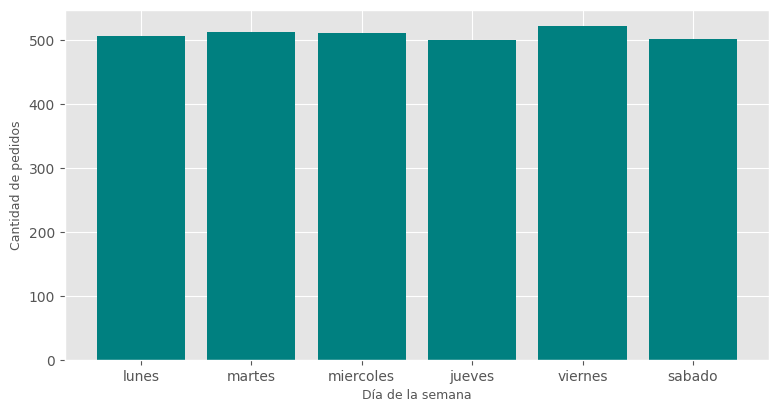

In [320]:
#Gráfico
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plt.bar(df_weekday.index,df_weekday.values.flatten(),color='teal')
plt.xticks(np.arange(6),('lunes','martes','miercoles','jueves','viernes','sabado'));
plt.xlabel('Día de la semana', fontsize = 9)
plt.ylabel('Cantidad de pedidos', fontsize = 9);

In [321]:
"""
Se generan los articulos por cada pedido por tipo de día, con el fin de entender en promedio en el rango de fecha de análisis
cuantos artículos por pedido son programados para entrega.
"""
promedio_articulos = df_final.groupby(['DiaToma','Pedido']).agg({'NúmeroArtículo':'count'}).groupby('DiaToma').mean().mean()
print(f"El promedio de articulos por pedido es: {promedio_articulos}")

El promedio de articulos por pedido es: NúmeroArtículo   7.136
dtype: float64
